# Readme

* start acq X1 X2 X3 -------> X1 is PP in ns, X2 is PN in ns, X3 is PD in ns this starts the acquisitions syncing with the pulse.
* write dac X -------> X is the dac number I forgot the min and the max but it may be from 0 to 400.
* write mux XXXX ---> where XXXX is the word to be sent to the MAX14866.
* clear mux -- opens every switch
* set mux -- closes every switch
* read -------> read the obtained acquisitions (8000pts).

In [1]:
%load_ext autoreload
%autoreload 2

from pico import Pic0rick, pplot

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import serial   
import datetime
import time
import glob
import os


/home/kelu/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Description

## Connecting an annular piezo 

The piezo has 5 rings connected to the transducers (TR4-8).

It faces water at around 17 mm, that's an echo at around 23us.

Checking power use: 5.2V out at 80mA (approximately, unsure of the tester quality)

## Image

![](data/20250505a.jpeg)

# Creates pairs of switches to check

In [2]:
TODO = []
for k in range(4095): 
    lst = [int(x) for x in bin(k)[2:]]
    ODD = np.sum(lst[1::2])
    EVEN = np.sum(lst[: : 2])
    if ( (ODD ==1 ) and (EVEN == 1) ) or (k == 0):
        TODO.append(k)
print(len(TODO))

37


# Open the device

In [3]:
p = Pic0rick()

Device on /dev/ttyACM1


## Running the acquisitions

In [46]:
gain = 280
i = 0
signals = []
for k in TODO:
    i = i+1
    MUX = f"0x{k:04x}"[2:]
    IMG = "imgs/rp2350_mux/"+MUX+".jpg"
    if not os.path.isfile(IMG):
        print("Doing value:",k)

        p.setmux(MUX)
        p.dac(gain)
        p.pulse(125,125,7000)
        signal = p.read()
        signals.append([{"gain":gain, "signal":np.array(signal), "f": "60MHz", "pair":bin(k)}])
        #pplot(signal, G= gain+20*i)

Doing value: 0
8001
Doing value: 3
8001
Doing value: 6
8001
Doing value: 9
8001
Doing value: 12
8001
Doing value: 18
8001
Doing value: 24
8001
Doing value: 33
8001
Doing value: 36
8001
Doing value: 48
8001
Doing value: 66
8001
Doing value: 72
8001
Doing value: 96
8001
Doing value: 129
8001
Doing value: 132
8001
Doing value: 144
8001
Doing value: 192
8001
Doing value: 258
8001
Doing value: 264
8001
Doing value: 288
8001
Doing value: 384
8001
Doing value: 513
8001
Doing value: 516
8001
Doing value: 528
8001
Doing value: 576
8001
Doing value: 768
8001
Doing value: 1026
8001
Doing value: 1032
8001
Doing value: 1056
8001
Doing value: 1152
8001
Doing value: 1536
8001
Doing value: 2049
8001
Doing value: 2052
8001
Doing value: 2064
8001
Doing value: 2112
8001
Doing value: 2304
8001
Doing value: 3072
8001


In [47]:
np.savez("data/array.npz", signal=signals, allow_pickle=True)

# Reopening

Text(0.5, 1.0, 'Pair of TX/RX: 0b110')

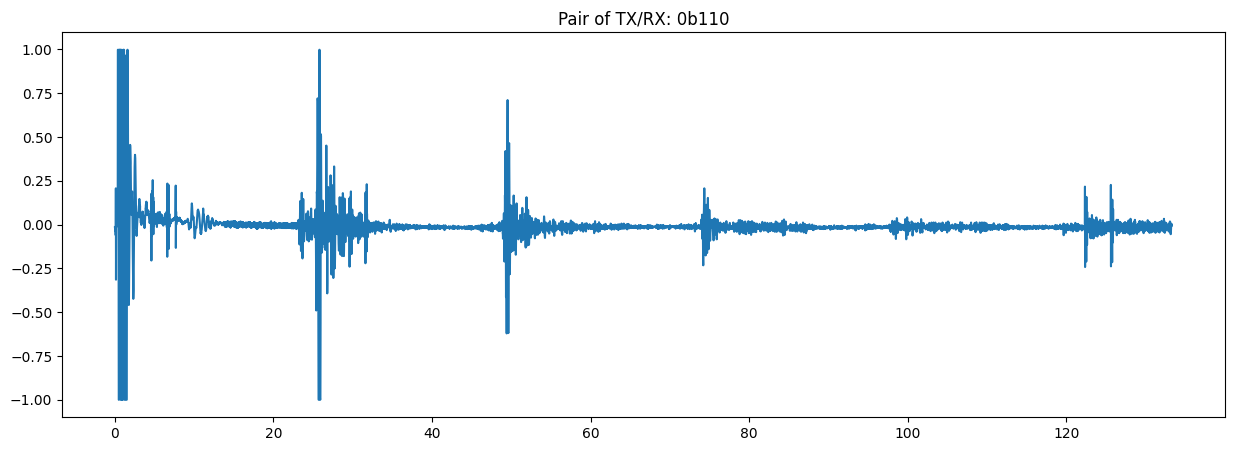

In [62]:
signals = np.load("data/array.npz", allow_pickle=True)["signal"]

plt.figure(figsize=(15,5))
k = 2
sig = signals[k][0]["signal"]
t = [x/60.0 for x in range(len(sig))]
plt.plot(t, sig)
plt.title("Pair of TX/RX: "+signals[k][0]["pair"])

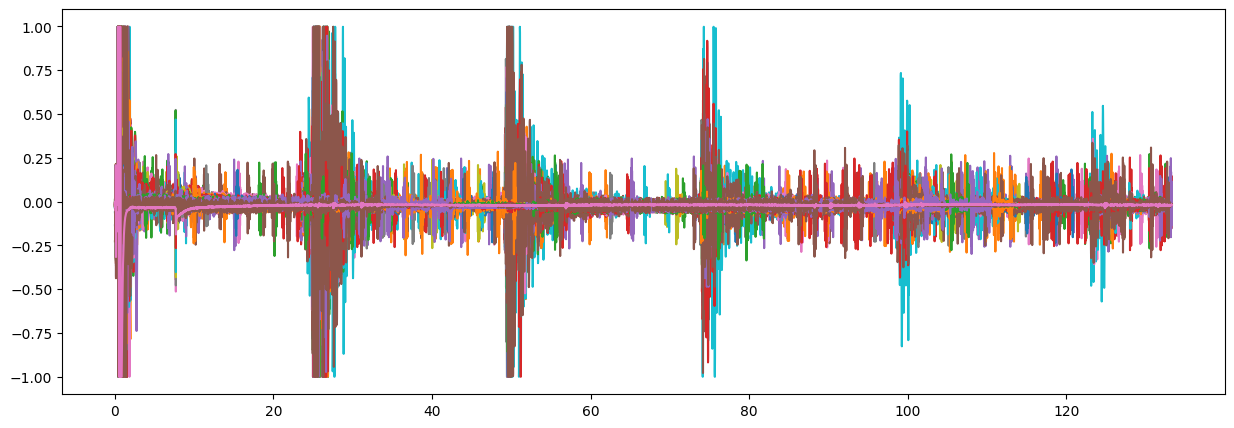

In [63]:
# All signals

plt.figure(figsize=(15,5))
t = [x/60.0 for x in range(len(sig))]
for k in range(len(signals)):
    sig = signals[k][0]["signal"]
    plt.plot(t, sig)

# Comparing envelopes

In [58]:
from scipy.signal import hilbert as h

In [67]:
def H(signal,k=50):
    ENV = []
    signal = np.abs(signal)
    for x in range(len(signal)//k-1):
        for i in range(k):
            ENV.append(np.mean(signal[x*k:(x+1)*k]))
    return np.array(ENV)



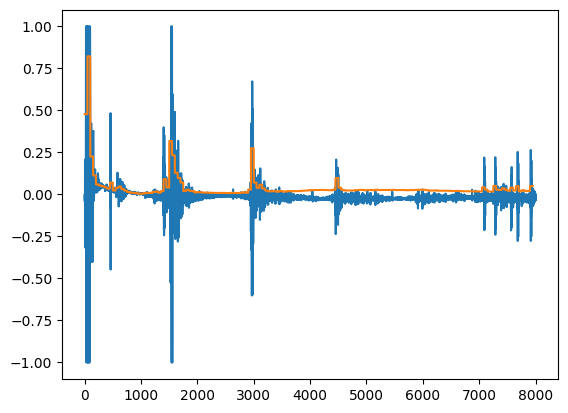

In [ ]:
plt.plot(signals[3][0]["signal"])
plt.plot(H(signals[3][0]["signal"]))